# Table of contents:

## 1. Setting up
## 2. Data cleaning
## 3. Preparing for Regression
## 4. Regression Analysis
## 5. Evaluation
## 6. Bonus : Regression analysis on Economy score vs. Health score



# 1. Setting up



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [5]:
#define path for data import
path = r"C:\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Prepared Data"

In [7]:
df = pd.read_pickle(os.path.join(path, 'df2015_2019_dropped_2.pkl'))

# 2. Data cleaning

In [8]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


In [9]:
df.shape

(778, 11)

In [10]:
#checking for missing values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

No missing values.



In [11]:
#checking for duplicates
dups = df.duplicated()
dups.shape

(778,)

No duplicates found.



# 3. Preparing for Regression Analysis



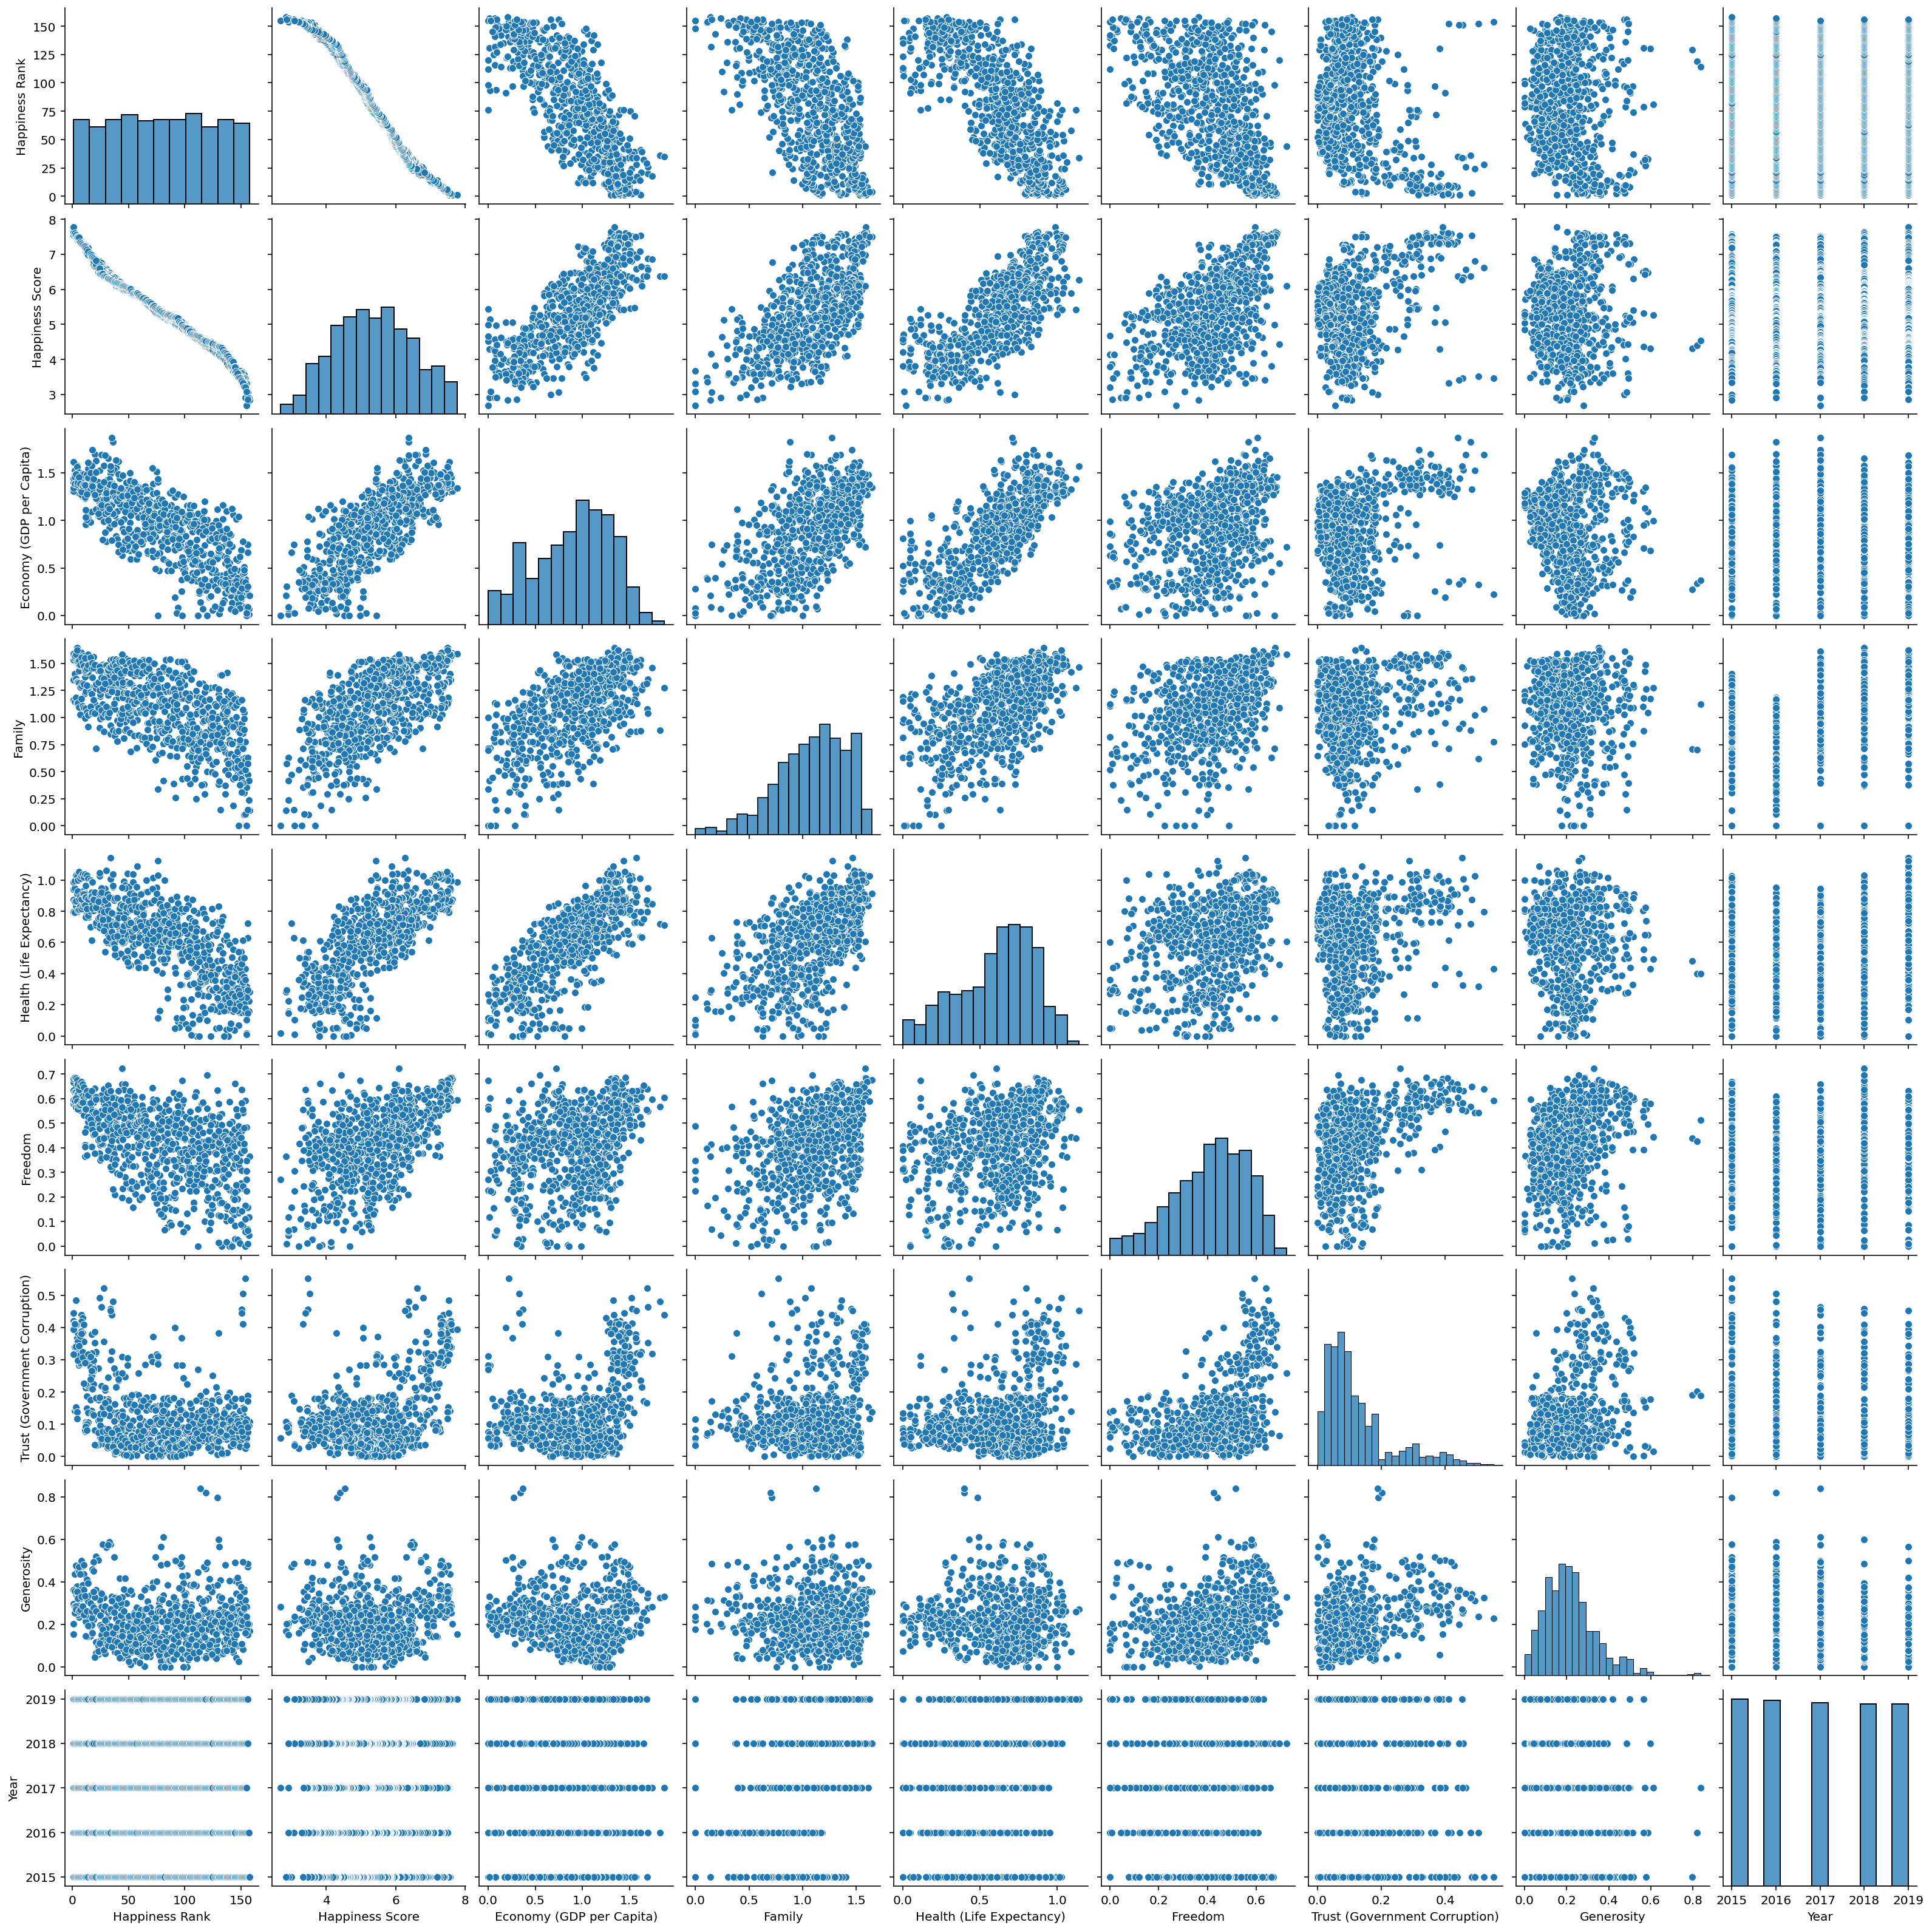

In [10]:
#scatterplot for visuals on which variables to explore
#g = sns.pairplot(df)

I will continue to explore the relation between Happiness score and Economy score.

### `Hypothesis:`

If the Economy score increases, the happiness score will increase as well.


# 4. Regression Analysis

In [12]:
#reshaping data into numpy arrays:
X = df['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [13]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [14]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [15]:
#create training and test sets for X and y:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [16]:
#create regression object
regression = LinearRegression()

In [17]:
#fitting training sets to the object
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
#applying model to create predictions for y-values
y_predict = regression.predict(X_test)
y_predict

array([[4.03108954],
       [6.50599495],
       [4.54902261],
       [6.42733734],
       [5.3447261 ],
       [4.36118463],
       [4.60093041],
       [3.82760581],
       [4.23895987],
       [5.7052725 ],
       [5.70833987],
       [4.23586935],
       [4.37225962],
       [4.89470735],
       [5.77875993],
       [6.39614514],
       [5.31377152],
       [3.84272668],
       [6.33698441],
       [5.92508677],
       [5.46938689],
       [4.59354278],
       [4.91477491],
       [5.669004  ],
       [7.0665398 ],
       [4.2315491 ],
       [4.62901202],
       [5.32025189],
       [6.45211397],
       [5.97908989],
       [6.22318396],
       [5.53714874],
       [6.04324559],
       [5.13016093],
       [5.56550939],
       [5.69330261],
       [5.83639206],
       [5.616837  ],
       [6.0033054 ],
       [6.03272578],
       [4.16499566],
       [5.27458686],
       [5.1452818 ],
       [6.62928739],
       [6.00069113],
       [6.11556656],
       [4.20802653],
       [4.140

# 5. Evaluation

Text(0, 0.5, 'Happiness score')

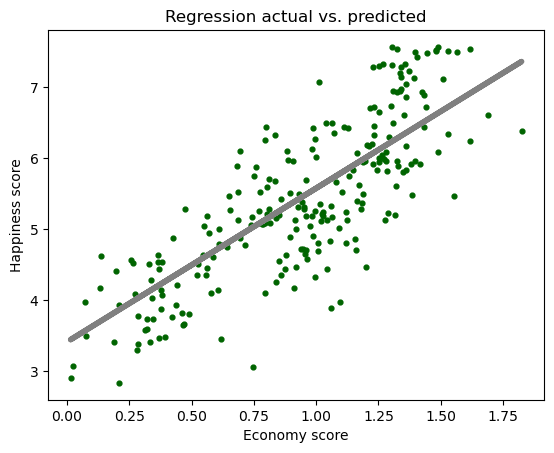

In [19]:
#creating a plot on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color = "darkgreen", s = 12)
plot_test.plot(X_test, y_predict, color = "grey", linewidth = 4)
plot_test.title("Regression actual vs. predicted")
plot_test.xlabel("Economy score")
plot_test.ylabel("Happiness score")

The regression line fits quite well on the data, but it seems like it is not a perfect fit.


In [21]:
#comparing y_predict with actual y-values
compare = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predict.flatten()})

In [22]:
compare.head(10)

,Actual,Predicted
0,3.781,4.031090
1,6.442,6.505995
2,4.513,4.549023
3,7.119,6.427337
4,5.510,5.344726
5,3.936,4.361185
6,5.044,4.600930
7,3.410,3.827606
8,4.081,4.238960
9,3.896,5.705272


The model doesn't seem to accurately predict the Happiness scores based on the Economy score alone.


In [23]:
#checking model's summary statistics:
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Slope: ", regression.coef_)
print("Mean squared error: ", rmse)
print("R2 Score: ", r2)

Slope:  [[2.16012458]]
Mean squared error:  0.45033372099803975
R2 Score:  0.6401001387334868


The slope\-value tells us that there is a positive relationship between the Economy and the Happiness scores. The mean squared error of 0.45 tells me that there is quite a bit of difference between the predicted values and the actual ones. The R2 score indicates that the model is a suboptimal fit, which explains that I would need to look at other models to accurately predict the Happiness score. It would probably be better to look at models which take multiple variables into consideration, in order to predict the Happiness scores more accurately.


# 6. Bonus Regression Analysis: Economy vs Health



### Hypothesis:

The higher the Economy score, the higher the Health score.


In [23]:
#reshaping Health score into numpy array:
z = df["Health (Life Expectancy)"].values.reshape(-1,1)
z

array([[0.94143   ],
       [0.94784   ],
       [0.87464   ],
       [0.88521   ],
       [0.90563   ],
       [0.88911   ],
       [0.89284   ],
       [0.91087   ],
       [0.90837   ],
       [0.93156   ],
       [0.91387   ],
       [0.86027   ],
       [0.89042   ],
       [0.81444   ],
       [0.69702   ],
       [0.91894   ],
       [0.89533   ],
       [0.89667   ],
       [0.80925   ],
       [0.90943   ],
       [0.72052   ],
       [1.02525   ],
       [0.79661   ],
       [0.89186   ],
       [0.85857   ],
       [0.79733   ],
       [0.94579   ],
       [0.78723   ],
       [0.84483   ],
       [0.8116    ],
       [0.69077   ],
       [0.7385    ],
       [0.72025   ],
       [0.95562   ],
       [0.88721   ],
       [0.8753    ],
       [0.72492   ],
       [0.6082    ],
       [0.61483   ],
       [0.67737   ],
       [0.64425   ],
       [0.59772   ],
       [0.78902   ],
       [0.99111   ],
       [0.96538   ],
       [0.79075   ],
       [0.74716   ],
       [0.954

In [24]:
# creating training and test sets:

X2_train, X2_test, z_train, z_test = train_test_split(X, z, test_size = 0.3, random_state = 0)

In [25]:
# creating another regression object

regression2 = LinearRegression()

In [26]:
# fitting object regression2 to training set
regression2.fit(X_train, z_train)

LinearRegression()

In [27]:
#create z_predict using X_test
z_predict = regression2.predict(X_test)

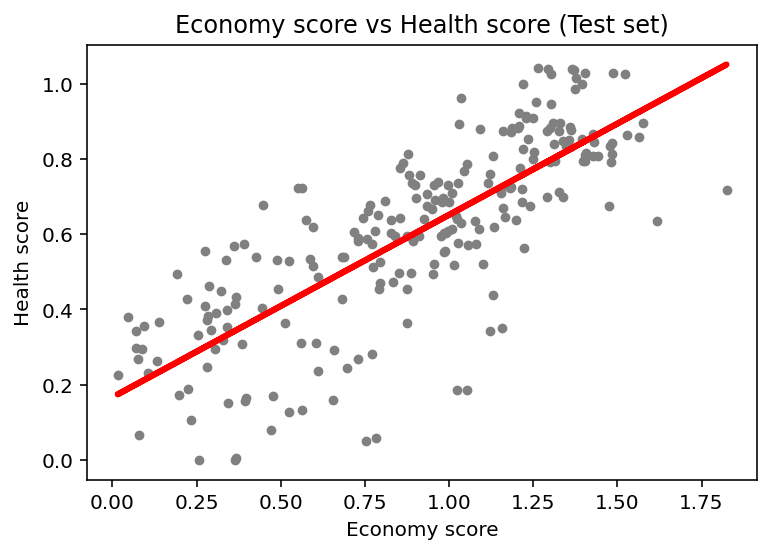

In [28]:
#create plot
plot2_test = plt
plot2_test.scatter(X_test, z_test, color='gray', s = 15)
plot2_test.plot(X_test, z_predict, color='red', linewidth =3)
plot2_test.title('Economy score vs Health score (Test set)')
plot2_test.xlabel('Economy score')
plot2_test.ylabel('Health score')
plot2_test.show()

The regression line fits to this dataset better than the regression line for the Economy vs Happiness scores.


In [29]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(z_test, z_predict)
r2_2 = r2_score(z_test, z_predict) 

In [31]:
# Print the model summary statistics.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.48518094]]
Mean squared error:  0.02399676642924922
R2 score:  0.605893741794482


The slope indicates a positive relationship between the Economy and Health scores. The mean squared error here is rather small, therefore indicating a good fit, but the R2 score of 0.6 indicates a moderate fit.


In [33]:
#creating dataframe for direct comparison
compare2 = pd.DataFrame({"Actual": z_test.flatten(), "Predicted": z_predict.flatten()})
compare2.head(10)

,Actual,Predicted
0,0.999000,0.843894
1,0.596019,0.607991
2,0.455690,0.591677
3,0.644250,0.528298
4,0.819480,0.774408
5,0.652169,0.549169
6,0.595770,0.640719
7,0.675000,0.881738
8,0.738500,0.635703
9,0.357000,0.212188


## Bonus 2: Multiple linear regression analysis



In [24]:
# performing a multiple regression analysis with Economy, Family, Freedom and Health as independent variables

X = df[["Family", "Health (Life Expectancy)", "Economy (GDP per Capita)", "Freedom", 
        "Generosity", "Trust (Government Corruption)"]].values.reshape(-1, 6)
y = df['Happiness Score'].values.reshape(-1,1)

In [25]:
X

array([[1.34951, 0.94143, 1.39651, 0.66557, 0.29678, 0.41978],
       [1.40223, 0.94784, 1.30232, 0.62877, 0.4363 , 0.14145],
       [1.36058, 0.87464, 1.32548, 0.64938, 0.34139, 0.48357],
       ...,
       [0.517  , 0.361  , 0.35   , 0.     , 0.158  , 0.025  ],
       [0.     , 0.105  , 0.026  , 0.225  , 0.235  , 0.035  ],
       [0.575  , 0.295  , 0.306  , 0.01   , 0.202  , 0.091  ]])

In [26]:
# creating training and test sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [27]:
# creating another regression object

regression = LinearRegression()

In [28]:
# fitting object regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
#create y_predict using X_test
y_predict = regression.predict(X_test)

In [30]:
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict) 

In [31]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.66665582 1.06503027 1.06282984 1.40202707 0.4298919  1.10067715]]
Mean squared error:  0.27998199008215324
R2 score:  0.7762426514177742


In [32]:
#creating dataframe for direct comparison
compare = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predict.flatten()})
compare.head(10)

,Actual,Predicted
0,3.781,4.285265
1,6.442,6.485001
2,4.513,4.108933
3,7.119,6.578925
4,5.510,5.214129
5,3.936,3.759431
6,5.044,4.432667
7,3.410,4.150997
8,4.081,4.449310
9,3.896,5.025840


In [33]:
X.shape

(778, 6)

In [34]:
y.shape

(778, 1)